In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import csv
import re

In [19]:
import pandas as pd
import glob

# Đọc và xử lý từng file CSV
path = 'data-17-11-2024/all/*.csv'
cleaned_dfs = []
for file in glob.glob(path):
    try:
        df = pd.read_csv(file, on_bad_lines='skip')
        df_cleaned = df.dropna()
        cleaned_dfs.append(df_cleaned)

    except pd.errors.ParserError as e:
        print(f"Lỗi khi đọc file {file}: {e}")

df_combined = pd.concat(cleaned_dfs, ignore_index=True)
df_combined.to_csv("combined_cleaned_file.csv", index=False)
df_combined.to_csv("combined_cleaned_file.txt", sep='\t', header=True, index=False)
print("Dữ liệu sau khi gộp, làm sạch và đánh lại ID:")
print(df_combined)

Dữ liệu sau khi gộp, làm sạch và đánh lại ID:
        id                                             Review  \
0        1    thầy dạy hay dễ hiểu vui tính colonsmilesmile .   
1        1    thầy dạy hay dễ hiểu vui tính colonsmilesmile .   
2        2                               năng cấp phòng máy .   
3        3      em thích khả năng sư phạm của thầy wzjwz293 .   
4        4                                thầy rất hòa đồng .   
...    ...                                                ...   
20774   96                              phòng máy có vấn đề .   
20775   97                       dạy dễ hiểu , không bị rối .   
20776   98                         sự tận tình với học viên .   
20777   99  phòng thực hành cần có một số nâng cấp nhỏ về ...   
20778  100  giảng viên chia thành nhiều nhóm để sinh viên ...   

                                      Sentence Component  \
0                                  thầy dạy hay dễ hiểu    
1                               vui tính colonsmilesm

In [20]:
df = pd.read_csv('combined_cleaned_file.csv').dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20779 entries, 0 to 20778
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  20779 non-null  int64 
 1   Review              20779 non-null  object
 2   Sentence Component  20779 non-null  object
 3   aspect_text         20779 non-null  object
 4   aspect              20779 non-null  object
 5   sentiment_text      20779 non-null  object
 6   sentiment           20779 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.1+ MB


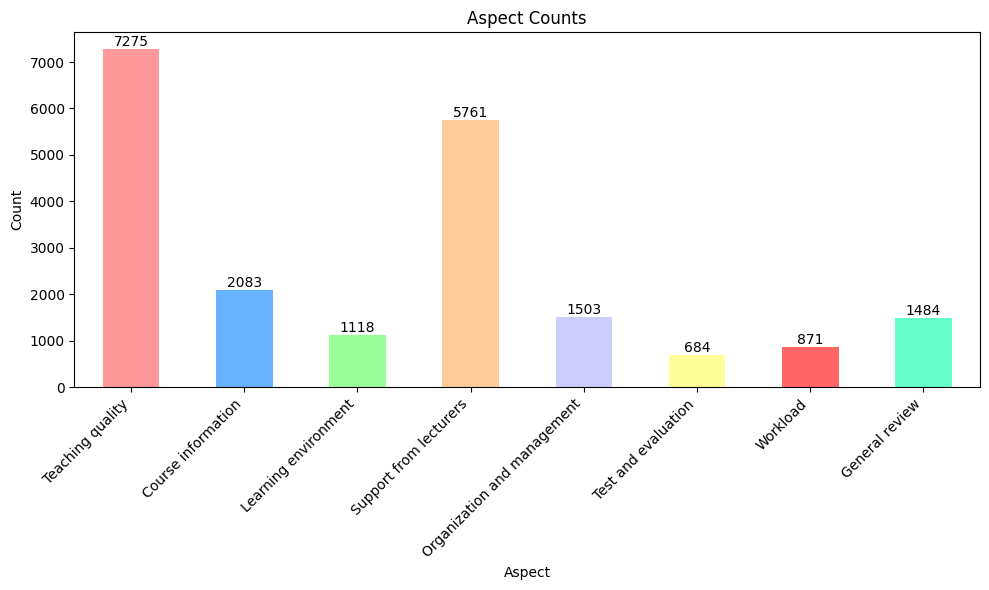

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is already loaded into a dataframe named df
# Count occurrences of the specified aspects
aspects_to_count = ['Teaching quality', 'Course information', 'Learning environment', 'Support from lecturers',
                    'Organization and management', 'Test and evaluation', 'Workload', 'General review']

# Filter and count occurrences of each aspect
aspect_counts = df['aspect'].value_counts().reindex(aspects_to_count).fillna(0)

# Define custom colors for each aspect
custom_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#CCCCFF', '#FFFF99', '#FF6666', '#66FFCC']

# Plotting the aspect counts as a bar chart
plt.figure(figsize=(10, 6))
bars = aspect_counts.plot(kind='bar', color=custom_colors)

# Adding labels and title
plt.title('Aspect Counts')
plt.xlabel('Aspect')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Adding the count labels on top of each bar
for index, value in enumerate(aspect_counts):
    plt.text(index, value, int(value), ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

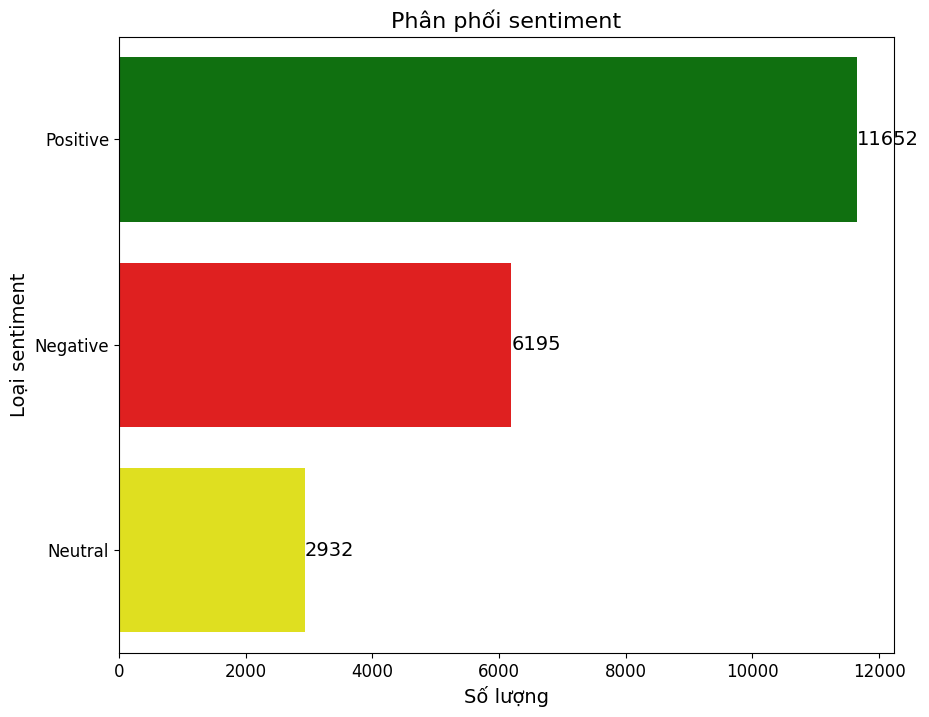

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo bảng màu tùy chỉnh
custom_palette = {
    'Positive': 'green',
    'Neutral': 'yellow',
    'Negative': 'red'
}

plt.figure(figsize=(10, 8))
ax = sns.countplot(
    data=df, 
    y='sentiment', 
    order=df['sentiment'].value_counts().index, 
    hue='sentiment',  # Gán biến y vào hue
    dodge=False,  # Tránh chia nhóm trong cột
    palette=custom_palette  # Gán bảng màu tùy chỉnh
)

# Thêm số trên cột
for p in ax.patches:
    width = p.get_width()  # Lấy chiều rộng của cột (số lượng)
    ax.text(
        width + 0.5,  # Vị trí x (cách một chút để không trùng với cột)
        p.get_y() + p.get_height() / 2,  # Vị trí y (giữa cột)
        int(width),  # Giá trị hiển thị (số lượng)
        va='center',  # Canh giữa theo chiều dọc
        fontsize=14  # Tăng kích thước chữ hiển thị trên cột
    )

# Tăng kích cỡ chữ cho tiêu đề và nhãn
plt.title('Phân phối sentiment', fontsize=16)  # Tăng kích thước tiêu đề
plt.xlabel('Số lượng', fontsize=14)  # Tăng kích thước nhãn trục X
plt.ylabel('Loại sentiment', fontsize=14)  # Tăng kích thước nhãn trục Y

# Tăng kích cỡ chữ cho nhãn trục
plt.xticks(fontsize=12)  # Tăng kích thước nhãn trên trục X
plt.yticks(fontsize=12)  # Tăng kích thước nhãn trên trục Y

plt.show()


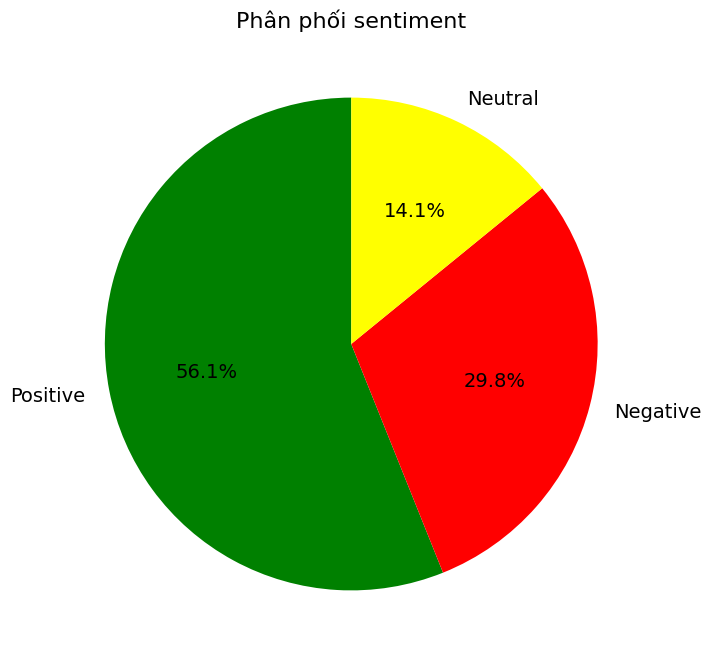

In [23]:
import matplotlib.pyplot as plt

# Ví dụ DataFrame
data = df['sentiment'].value_counts()  # Thống kê số lượng từng loại sentiment trong cột 'sentiment'

# Tạo bảng màu tùy chỉnh
colors = {
    'Positive': 'green',
    'Neutral': 'yellow',
    'Negative': 'red'
}

# Lấy danh sách màu theo thứ tự các nhãn (index)
color_list = [colors[label] for label in data.index]

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(
    data, 
    labels=data.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=color_list,  # Gán màu cho các phần
    textprops={'fontsize': 14}  # Tăng kích thước chữ của nhãn và tỷ lệ
)
plt.title('Phân phối sentiment', fontsize=16)  # Tăng kích thước tiêu đề
plt.show()


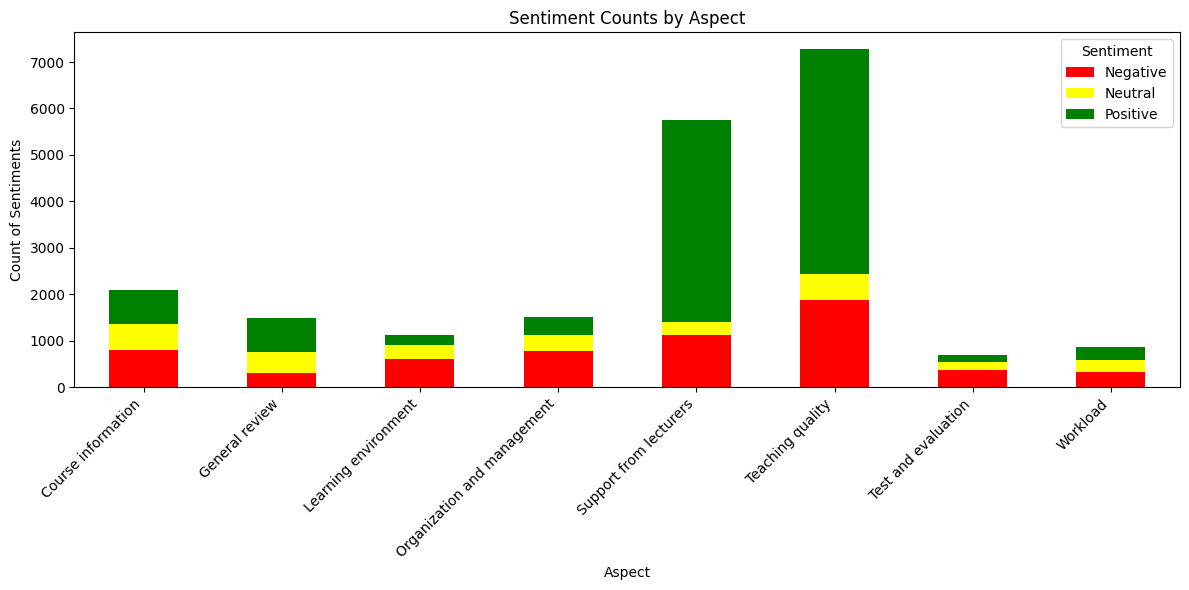

In [24]:
import matplotlib.pyplot as plt

# Count the number of each sentiment for each aspect
sentiment_counts = df.groupby(['aspect', 'sentiment']).size().unstack(fill_value=0)

# Define custom colors for each sentiment
colors = {
    'Positive': 'green', 
    'Neutral': 'yellow', 
    'Negative': 'red'
}

# Plotting the data as a bar chart
sentiment_counts.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 6), 
    color=[colors[col] for col in sentiment_counts.columns]  # Apply custom colors
)
plt.title("Sentiment Counts by Aspect")
plt.xlabel("Aspect")
plt.ylabel("Count of Sentiments")
plt.legend(title="Sentiment")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [26]:
def get_last_two_digits(string):
    string = str(string)
    # Lấy các chữ số cuối từ chuỗi
    digits = ''.join(filter(str.isdigit, string))
    
    # Kiểm tra độ dài của chuỗi các số
    if len(digits) >= 2:
        return digits[-2:]  # Lấy 2 số cuối
    elif len(digits) == 1:
        return '0' + digits  # Lấy 1 số nếu chuỗi chỉ có 1 số
    else:
        return ''  # Trả về chuỗi rỗng nếu không có số


In [27]:
def get_first_two_digits(string):
    # Lấy các chữ số từ chuỗi
    string = str(string)
    digits = ''.join(filter(str.isdigit, string))
    
    # Kiểm tra độ dài của chuỗi các số
    if len(digits) >= 2:
        return digits[:2]  # Lấy 2 số đầu
    elif len(digits) == 1:
        return digits  # Lấy 1 số nếu chuỗi chỉ có 1 số
    else:
        return ''  # Trả về chuỗi rỗng nếu không có số

In [28]:
import pandas as pd
import glob
import re

def get_first_two_digits(string):
    digits = ''.join(filter(str.isdigit, string))
    if len(digits) >= 2:
        return digits[:2]
    elif len(digits) == 1:
        return '0' + digits
    return ''

def get_last_two_digits(string):
    digits = ''.join(filter(str.isdigit, string))
    if len(digits) >= 2:
        return digits[-2:]
    elif len(digits) == 1:
        return '0' + digits
    return ''

def check_column_mismatch(glob_path, expected_columns=7):
    with open("logLoi.txt", "w") as f:
        for file in glob.glob(glob_path):
            # Lấy khoảng ID từ tên file để in ra thông tin, nếu cần
            file_parts = file.split('/')[-1]
            id_range = re.findall(r'\d+', file_parts)[:2]
            
            text_split = file.split('\\')
            f.write(f"Checking file: {text_split} with expected ID range {id_range[0]} - {id_range[1]}\n")

            arr = []

            first_id_range1 = get_first_two_digits(id_range[0])
            first_id_range2 = get_first_two_digits(id_range[1])
            
            temp = int(first_id_range1)
            arr.append(int(first_id_range1))
            while (temp < int(first_id_range2)):
                temp += 100
                arr.append(temp)

            # Đọc dữ liệu từ file
            df = pd.read_csv(file)
            
            mismatched_rows = []
            
            # Đảm bảo cột `id` tồn tại trong dữ liệu
            if 'id' not in df.columns:
                f.write("Không tìm thấy cột 'id' trong file.\n")
                continue
            
            # Kiểm tra từng dòng xem có đủ số cột mong đợi không, dựa trên `id`
            for idx, row in df.iterrows():
                row_id = str(row['id'])  # Lấy giá trị `id` của dòng, đảm bảo là chuỗi
                second = get_last_two_digits(row_id)
                second_first = get_first_two_digits(row_id)
                id_sentence = ''
                
                for i in range(0, len(arr)):
                    if int(second_first) == arr[i]:
                        id_sentence = str(arr[i]) + second
                
                cell_count = row.count()  # Đếm số lượng cell không null
                
                if cell_count != expected_columns:
                    mismatched_rows.append((cell_count, expected_columns, idx))
            
            # Hiển thị kết quả kiểm tra
            if mismatched_rows:
                f.write("File có lỗi\n")
                f.write(f"Có {len(mismatched_rows)} dòng bị lệch cột.\n")
                for row_info in mismatched_rows:
                    f.write(f"Câu có {row_info[0]}  cột (mong đợi {expected_columns} cột) tại dòng {row_info[2]} \n")  # Sửa lại idx thành row_info[2]
            else:
                f.write("Không có dòng nào bị lệch cột.\n")


In [29]:
check_column_mismatch(path)

In [ ]:
## Xử lý dữ liệu cho unsloth LLM

In [ ]:
import json

def read_json_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        return data
    except FileNotFoundError:
        print(f"Error: Input file '{file_path}' not found.")
        return None
    except json.JSONDecodeError:
        print(f"Error: Could not decode JSON from '{file_path}'. Ensure it's valid JSON.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while reading the file: {e}")
        return None

def format_single_entry_for_llm(data_item):
    user_text = data_item.get("text")
    if not user_text:
        print(f"Warning: Skipping item due to missing 'text' field: {data_item}")
        return None

    aspects = data_item.get("aspects", [])
    model_parts = []

    if aspects:
        for aspect in aspects:
            category = aspect.get("category", "N/A")
            polarity = aspect.get("polarity", "N/A")
            model_parts.append(f"Category: {category}, Polarity: {polarity}")
        model_response = "; ".join(model_parts)
    else:
        model_response = "No aspects identified for this text."

    tuning_entry = (
        f"<start_of_turn>user\n{user_text}<end_of_turn>\n"
        f"<start_of_turn>model\n{model_response}<end_of_turn>\n"
    )
    return tuning_entry

def create_llm_tuning_data_from_list(json_data_list):
    all_tuning_strings = []
    if not isinstance(json_data_list, list):
        print(f"Error: Expected a list of items, but got {type(json_data_list)}.")
        return ""

    for item in json_data_list:
        formatted_entry = format_single_entry_for_llm(item)
        if formatted_entry:
            all_tuning_strings.append(formatted_entry)

    return "".join(all_tuning_strings)

def process_json_file_to_llm_format(input_json_path, output_file_path):
    data_list = read_json_file(input_json_path)

    if data_list is None:
        return

    if not isinstance(data_list, list):
        print(f"Error: Expected a JSON array (list) in '{input_json_path}', but got {type(data_list)}.")
        return

    formatted_llm_data = create_llm_tuning_data_from_list(data_list)

    try:
        with open(output_file_path, 'w', encoding='utf-8') as f:
            f.write(formatted_llm_data)
        print(f"Successfully created LLM tuning data at '{output_file_path}'")
    except IOError:
        print(f"Error: Could not write to output file '{output_file_path}'.")
    except Exception as e:
        print(f"An unexpected error occurred while writing the file: {e}")


if __name__ == "__main__":
    # To use this script:
    # 1. Make sure this Python file (e.g., process_data.py) is in a directory.
    # 2. Create your input JSON file (e.g., 'my_data.json') in the same directory.
    #    The JSON file should contain a list of objects, like the example previously shown.
    # 3. Specify the path to your input JSON file and the desired output file path below.
    # 4. Run the script from your terminal: python process_data.py

    input_file = "input.json"  # Replace with your input JSON file name/path
    output_file = "output_llm.txt" # Replace with your desired output file name/path

    print(f"Processing '{input_file}' to '{output_file}'...")
    process_json_file_to_llm_format(input_file, output_file)
    print("Processing complete.")

